In [2]:
import BoundaryLayerToolbox as blt
import matplotlib.pyplot as plt
import numpy as np
from netCDF4 import Dataset
%matplotlib inline

In [3]:
file = 'wrfout_d02_2012-05-30_00:00:00.nc'

In [4]:
nc = Dataset(file, 'r')

In [5]:
cca_lat, cca_long = 19.326180, -99.175842

In [6]:
pblh = nc.variables['PBLH']
T = nc.variables['T']
T2 = nc.variables['T2']
u = nc.variables['U']
v = nc.variables['V']
PH = nc.variables['PH']
PHB = nc.variables['PHB']
relieve = nc.variables['HGT']

In [7]:
xlat = nc.variables['XLAT']
xlong = nc.variables['XLONG']

xlat_u = nc.variables['XLAT_U']
xlong_u = nc.variables['XLONG_U']

xlat_v = nc.variables['XLAT_V']
xlong_v = nc.variables['XLONG_V']

In [8]:
u_interpol = blt.interpolate_velocity(xlong, xlat, xlong_u, xlat_u, u)

In [9]:
v_interpol = blt.interpolate_velocity(xlong, xlat, xlong_v, xlat_v, v, uu = False)

In [10]:
Z = blt.compute_height(PH, PHB)

In [11]:
nx_cca, ny_cca = blt.near_coord(xlong, xlat, cca_long, cca_lat)

In [12]:
nx_cca

23

In [13]:
ny_cca

26

In [14]:
relieve.shape

(97, 51, 60)

In [15]:
print(cca_lat, cca_long)

19.32618 -99.175842


In [16]:
xlong[0, nx_cca, ny_cca]

-99.177864

In [17]:
xlat[0, nx_cca, ny_cca]

19.305618

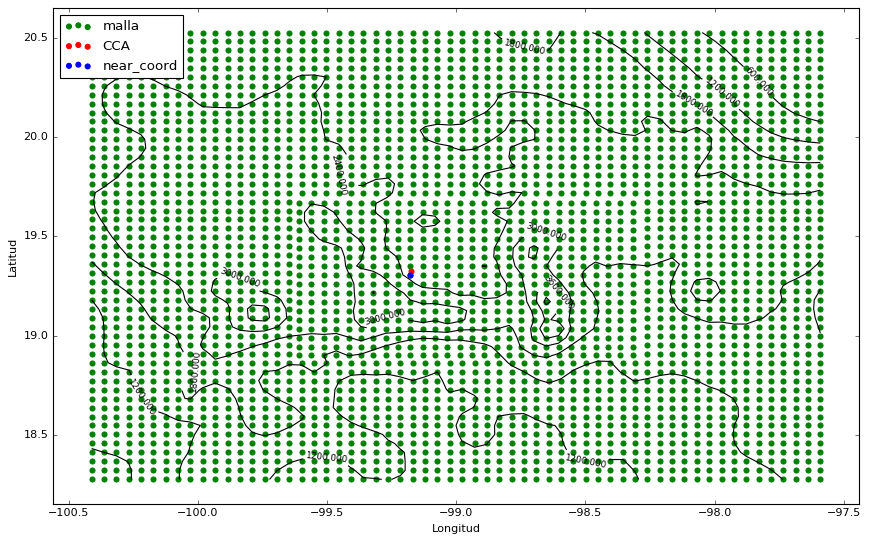

In [18]:
fig = plt.figure(figsize=(13,8))
Cs = plt.contour(xlong[0,:,:], xlat[0,:, :], relieve[0, :, :], colors= 'k')
plt.clabel(Cs, fontsize = 8)
plt.scatter(xlong[0,:,:], xlat[0,:,:], color='g', label=('malla'))
plt.scatter(cca_long, cca_lat, color='r', label=('CCA'))
plt.scatter(xlong[0,nx_cca, ny_cca], xlat[0,nx_cca, ny_cca], color='b', label=('near_coord'))
plt.legend(loc = 2)
plt.xlabel('Longitud')
plt.ylabel('Latitud')

In [19]:
T.shape

(97, 59, 51, 60)

In [20]:
Z.shape

(97, 59, 51, 60)

In [21]:
time_range = range(0, 97)
capa_limite = np.zeros(97)

for t in time_range:
    Ri = blt.compute_Richardson(T2[t, nx_cca, ny_cca], T[t, :, nx_cca, ny_cca], Z[t, :, nx_cca, ny_cca], u_interpol[t, :, nx_cca, ny_cca], v_interpol[t, :, nx_cca, ny_cca])
    n, z  = blt.detecta_PBL(Ri, Z[t, :, nx_cca, ny_cca], 0.21)
    
    capa_limite[t] = z
    
capa_limite

Capa límite:  2317.63 . Ínidce:  0
Capa límite:  2501.81 . Ínidce:  8
Capa límite:  2381.64 . Ínidce:  3
Capa límite:  2317.41 . Ínidce:  0
Capa límite:  2359.71 . Ínidce:  2
Capa límite:  2317.37 . Ínidce:  0
Capa límite:  2317.34 . Ínidce:  0
Capa límite:  2317.3 . Ínidce:  0
Capa límite:  2317.26 . Ínidce:  0
Capa límite:  2317.23 . Ínidce:  0
Capa límite:  2317.22 . Ínidce:  0
Capa límite:  2317.19 . Ínidce:  0
Capa límite:  2317.16 . Ínidce:  0
Capa límite:  2317.15 . Ínidce:  0
Capa límite:  2317.25 . Ínidce:  0
Capa límite:  2359.35 . Ínidce:  2
Capa límite:  2466.23 . Ínidce:  7
Capa límite:  2499.11 . Ínidce:  8
Capa límite:  2543.22 . Ínidce:  9
Capa límite:  2587.77 . Ínidce:  10
Capa límite:  2699.29 . Ínidce:  12
Capa límite:  2880.03 . Ínidce:  14
Capa límite:  2880.53 . Ínidce:  14
Capa límite:  2880.3 . Ínidce:  14
Capa límite:  2879.6 . Ínidce:  14
Capa límite:  3014.54 . Ínidce:  15
Capa límite:  2544.72 . Ínidce:  9
Capa límite:  2446.43 . Ínidce:  6
Capa límite:  24

array([ 2317.63183594,  2501.80883789,  2381.64477539,  2317.41235352,
        2359.70507812,  2317.37255859,  2317.33935547,  2317.30273438,
        2317.25830078,  2317.23120117,  2317.21923828,  2317.19433594,
        2317.15991211,  2317.15307617,  2317.25048828,  2359.35424805,
        2466.23071289,  2499.10620117,  2543.22045898,  2587.77050781,
        2699.28955078,  2880.03393555,  2880.53198242,  2880.29614258,
        2879.59887695,  3014.54052734,  2544.71899414,  2446.43481445,
        2403.0859375 ,  2317.45263672,  2317.41577148,  2317.37304688,
        2317.33642578,  2317.30493164,  2317.27197266,  2317.24316406,
        2317.22460938,  2317.21899414,  2317.29931641,  2338.51318359,
        2402.98706055,  2500.79980469,  2633.01806641,  2790.63891602,
        3020.15917969,  3587.81811523,  3396.66259766,  3022.11279297,
        2592.29589844,  2426.62548828,  2360.96166992,  2339.16650391,
        2339.10083008,  2317.57202148,  2317.54492188,  2338.87109375,
      

In [22]:
relieve.shape

(97, 51, 60)

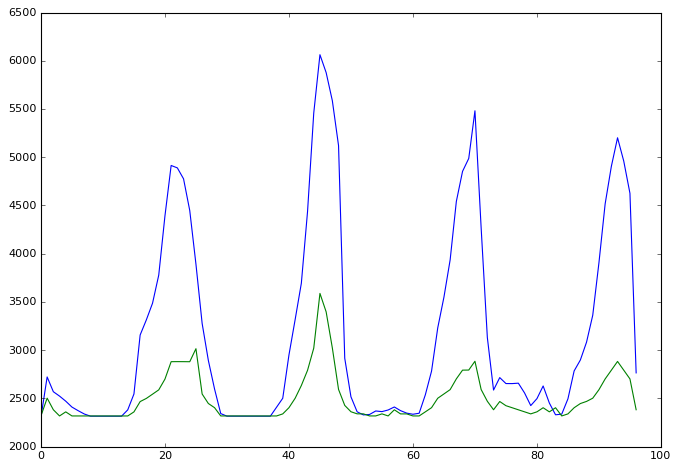

In [23]:
plt.figure(figsize = (10,7))
plt.plot(pblh[:, nx_cca, ny_cca] + relieve[0, nx_cca, ny_cca])
plt.plot(capa_limite)

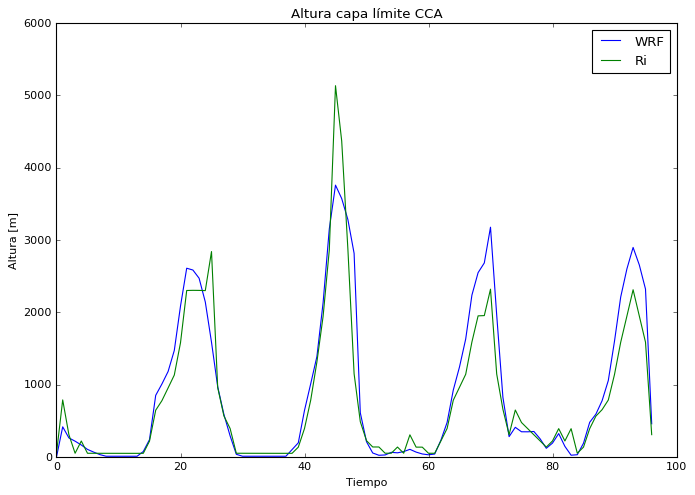

In [24]:
plt.figure(figsize = (10,7))
plt.plot(pblh[:, nx_cca, ny_cca], label= 'WRF')
plt.plot((capa_limite - relieve[0, nx_cca, ny_cca])*4, label = 'Ri')
plt.legend()
plt.title('Altura capa límite CCA')
plt.ylabel('Altura [m]')
plt.xlabel('Tiempo')

(0, 4000)

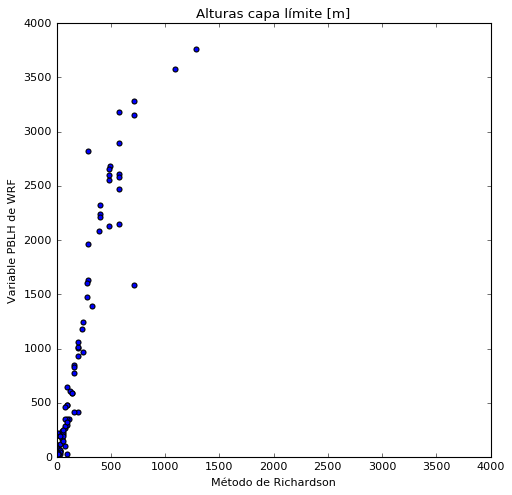

In [25]:
plt.figure(figsize=(7,7))
plt.scatter(capa_limite - relieve[0, nx_cca, ny_cca], pblh[:, nx_cca, ny_cca])
plt.xlabel('Método de Richardson')
plt.ylabel('Variable PBLH de WRF')
plt.title('Alturas capa límite [m]')
plt.ylim(0,4000)
plt.xlim(0,4000)

In [26]:
clccc

In [27]:
import scipy.optimize as optimization

In [28]:
x0 = np.array([1.0, 1.0])

In [29]:
capa_limite_ri = capa_limite - relieve[0, nx_cca, ny_cca]

In [30]:
popt, pcov = optimization.curve_fit(ajuste_lineal, capa_limite_ri, pblh[:, nx_cca, ny_cca])

In [31]:
popt[1]

4.0330398318142144

In [32]:
ajuste_lineal(capa_limite_ri, *popt)

array([  137.19666023,   879.98984521,   395.36339479,   136.31147888,
         306.87972182,   136.15098437,   136.01707485,   135.86938052,
         135.69017806,   135.58088426,   135.53263744,   135.4322053 ,
         135.29337263,   135.26580302,   135.65866994,   305.46481014,
         736.50184994,   869.09000367,  1047.00456258,  1226.67668401,
        1676.43742631,  2405.38672945,  2407.39537233,  2406.44422085,
        2403.63212081,  2947.85717181,  1053.04821455,   656.66420304,
         481.83645562,   136.47394264,   136.32526368,   136.15295363,
         136.0052593 ,   135.87824218,   135.74531728,   135.62913107,
         135.55429928,   135.53165282,   135.85559571,   221.41196707,
         481.43768093,   875.92037411,  1409.16189011,  2044.85305491,
        2970.51742051,  5259.90851846,  4488.97070199,  2978.39642069,
        1244.92776466,   576.77240154,   311.94760659,   224.04683391,
         223.78196875,   136.95542616,   136.84613235,   222.85543298,
      

In [33]:
ajuste_legend = str(popt[1]) + ' x + ' + str(popt[0])

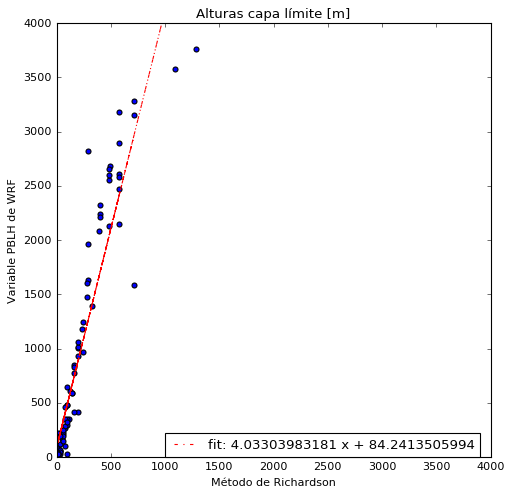

In [34]:
plt.figure(figsize=(7,7))
plt.scatter(capa_limite - relieve[0, nx_cca, ny_cca], pblh[:, nx_cca, ny_cca])
plt.plot(capa_limite_ri , ajuste_lineal(capa_limite_ri, *popt), 'r-.', label= 'fit: ' + ajuste_legend)
plt.xlabel('Método de Richardson')
plt.ylabel('Variable PBLH de WRF')
plt.title('Alturas capa límite [m]')
plt.ylim(0,4000)
plt.xlim(0,4000)
plt.legend(loc = (0.25,0))

----

In [35]:
n_criticos_ri = []
for t in time_range:
    Ri = blt.compute_Richardson(T2[t, nx_cca, ny_cca], T[t, :, nx_cca, ny_cca], Z[t, :, nx_cca, ny_cca], u_interpol[t, :, nx_cca, ny_cca], v_interpol[t, :, nx_cca, ny_cca])
    n_ri  = blt.detecta_PBL_indices(Ri, Z[t, :, nx_cca, ny_cca], 0.21)
    n_criticos_ri.append(n_ri)
    
#n_criticos_ri

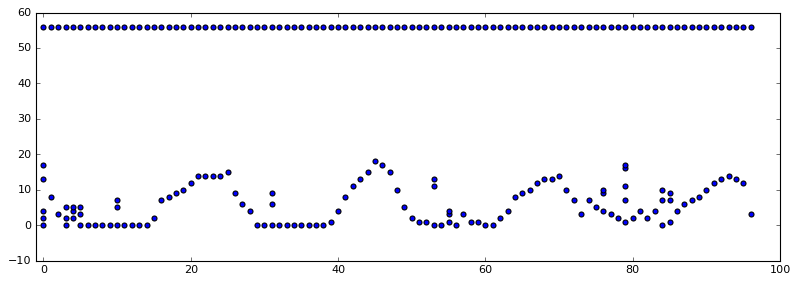

In [36]:
plt.figure(figsize=(12,4))
plt.xlim(-1, 100)
for t in time_range:
    plt.scatter(np.zeros_like(n_criticos_ri[t]) + t, n_criticos_ri[t] )

In [37]:
n_criticos_ri = []
for t in time_range:
    Ri = blt.compute_Richardson(T2[t, nx_cca, ny_cca], T[t, :, nx_cca, ny_cca], Z[t, :, nx_cca, ny_cca], u_interpol[t, :, nx_cca, ny_cca], v_interpol[t, :, nx_cca, ny_cca])
    n_ri, z  = blt.detecta_PBL(Ri, Z[t, :, nx_cca, ny_cca], 0.21)
    n_criticos_ri.append(n_ri)
    
#n_criticos_ri

Capa límite:  2317.63 . Ínidce:  0
Capa límite:  2501.81 . Ínidce:  8
Capa límite:  2381.64 . Ínidce:  3
Capa límite:  2317.41 . Ínidce:  0
Capa límite:  2359.71 . Ínidce:  2
Capa límite:  2317.37 . Ínidce:  0
Capa límite:  2317.34 . Ínidce:  0
Capa límite:  2317.3 . Ínidce:  0
Capa límite:  2317.26 . Ínidce:  0
Capa límite:  2317.23 . Ínidce:  0
Capa límite:  2317.22 . Ínidce:  0
Capa límite:  2317.19 . Ínidce:  0
Capa límite:  2317.16 . Ínidce:  0
Capa límite:  2317.15 . Ínidce:  0
Capa límite:  2317.25 . Ínidce:  0
Capa límite:  2359.35 . Ínidce:  2
Capa límite:  2466.23 . Ínidce:  7
Capa límite:  2499.11 . Ínidce:  8
Capa límite:  2543.22 . Ínidce:  9
Capa límite:  2587.77 . Ínidce:  10
Capa límite:  2699.29 . Ínidce:  12
Capa límite:  2880.03 . Ínidce:  14
Capa límite:  2880.53 . Ínidce:  14
Capa límite:  2880.3 . Ínidce:  14
Capa límite:  2879.6 . Ínidce:  14
Capa límite:  3014.54 . Ínidce:  15
Capa límite:  2544.72 . Ínidce:  9
Capa límite:  2446.43 . Ínidce:  6
Capa límite:  24

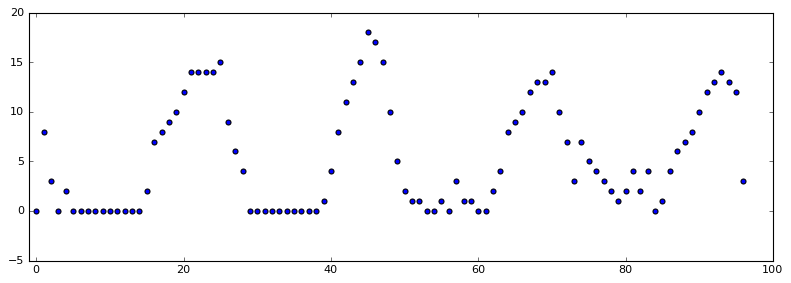

In [38]:
plt.figure(figsize=(12,4))
plt.xlim(-1, 100)
for t in time_range:
    plt.scatter(np.zeros_like(n_criticos_ri[t]) + t, n_criticos_ri[t] )

### Los dz

In [39]:
t = 20

In [40]:
z_cca_20 = Z[20, :, nx_cca, ny_cca]

In [41]:
dz_s = np.zeros(58)

for i in range(0, 58):
    dz_s[i] = z_cca_20[i+1] - z_cca_20[i]
    

In [42]:
dz_s.shape

(58,)

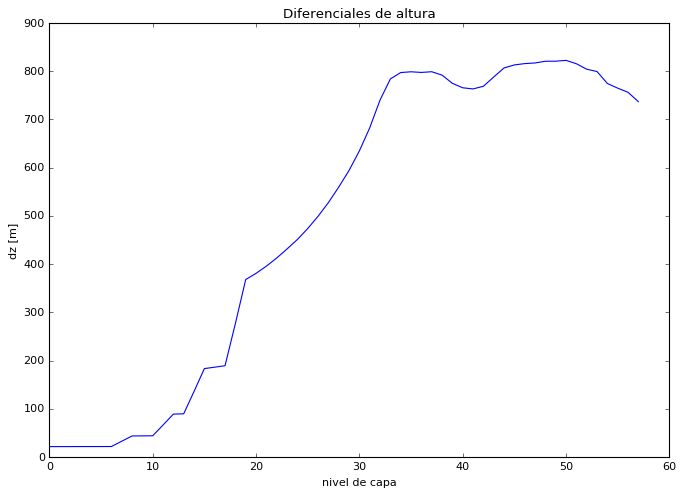

In [43]:
plt.figure(figsize=(10,7))
plt.plot(dz_s)
#plt.scatter(range(0,58), dz_s)
plt.xlabel('nivel de capa')
plt.ylabel('dz [m]')
plt.title('Diferenciales de altura')

In [44]:
np.mean(dz_s)

491.04696760506465

In [45]:
np.std(dz_s)

315.32173461352727